In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.interpolate import interp1d

In [30]:
dt = 0.00001
D = 1.0
L = 10
N = 20
length = 100000

In [31]:
x = 2*L*np.random.random(size=(N,))
steps = np.random.normal(loc=0.0,scale=np.sqrt(2*D*dt),size=(N,length))

x = np.column_stack((x,steps))

paths = np.mod(np.cumsum(x,axis=1),2*L)-L

intensity = norm.pdf(paths,loc=0)
intensity = np.sum(intensity,axis=0)

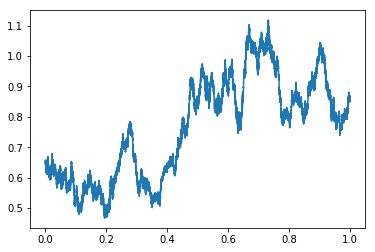

In [36]:
tt = np.arange(length+1)*dt
plt.plot(tt,intensity)

(100001,)


(array([ 884., 2341., 3600., 4843., 6244., 6328., 5411., 5147., 2911.,
        1685., 1262., 2066., 1503., 2702., 3927., 6444., 4543., 5068.,
        4983., 4644., 4221., 3186., 3280., 2124., 2478., 3410., 2969.,
        1152.,  447.,  198.]),
 array([0.46783299, 0.48949647, 0.51115995, 0.53282343, 0.55448691,
        0.5761504 , 0.59781388, 0.61947736, 0.64114084, 0.66280432,
        0.6844678 , 0.70613128, 0.72779476, 0.74945824, 0.77112173,
        0.79278521, 0.81444869, 0.83611217, 0.85777565, 0.87943913,
        0.90110261, 0.92276609, 0.94442957, 0.96609306, 0.98775654,
        1.00942002, 1.0310835 , 1.05274698, 1.07441046, 1.09607394,
        1.11773742]),
 <a list of 30 Patch objects>)

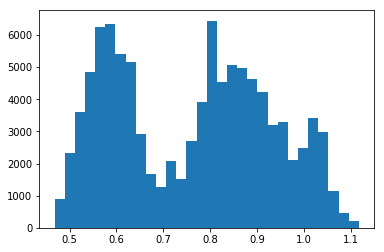

In [33]:
print(intensity.shape)
plt.hist(intensity,bins=30)

In [11]:
print(np.fft.fftfreq(10,0.1))

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]


(50001,)
(50001,)


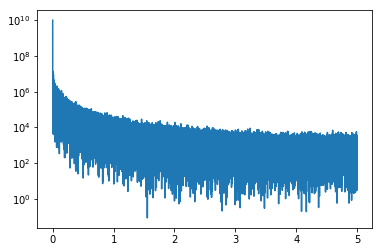

In [17]:
freq = np.fft.fftfreq(100001,0.1)[:50001]
print(freq.shape)
f = np.fft.rfft(intensity)
ps = np.abs(f*np.conjugate(f))
print(ps.shape)

plt.semilogy(freq,ps)


In [25]:
acf = np.fft.irfft(ps)/100001/np.mean(intensity)**2

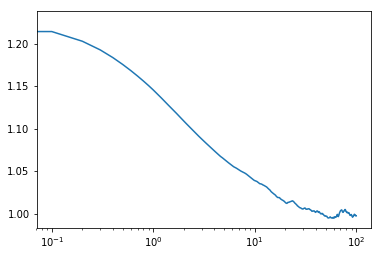

In [29]:
time = np.arange(50001)*dt
plt.semilogx(time[:1000],acf[:1000])

In [41]:
intensity_interp = interp1d(tt,intensity*10000)
t = 0
delta_t_list=[]
while t < tt[-1]:
    current_int = intensity_interp(t)
    delta_t = np.random.exponential(1/current_int)
    delta_t_list.append(delta_t)
    t = t + delta_t

In [43]:
delta_t_list = np.array(delta_t_list)

(array([2.592e+03, 1.632e+03, 1.111e+03, 7.050e+02, 4.790e+02, 3.090e+02,
        2.350e+02, 1.380e+02, 1.030e+02, 5.000e+01, 4.200e+01, 3.600e+01,
        2.100e+01, 1.300e+01, 8.000e+00, 6.000e+00, 1.100e+01, 1.100e+01,
        6.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([1.16732015e-08, 5.31195177e-05, 1.06227362e-04, 1.59335207e-04,
        2.12443051e-04, 2.65550896e-04, 3.18658740e-04, 3.71766585e-04,
        4.24874429e-04, 4.77982274e-04, 5.31090119e-04, 5.84197963e-04,
        6.37305808e-04, 6.90413652e-04, 7.43521497e-04, 7.96629341e-04,
        8.49737186e-04, 9.02845030e-04, 9.55952875e-04, 1.00906072e-03,
        1.06216856e-03, 1.11527641e-03, 1.16838425e-03, 1.22149210e-03,
        1.27459994e-03, 1.32770779e-03, 1.38081563e-03, 1.43392348e-03,
        1.48703132e-03, 1.54013916e-03, 1.59324701e-03]),
 <a list of 30 Patch objects>)

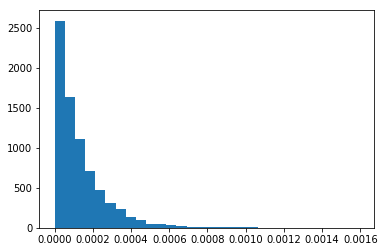

In [44]:
plt.hist(delta_t_list,bins=30)